In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [1]:
client = str(input("Enter Client Name : "))

Enter Client Name : HSBC


In [2]:
le = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))

Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


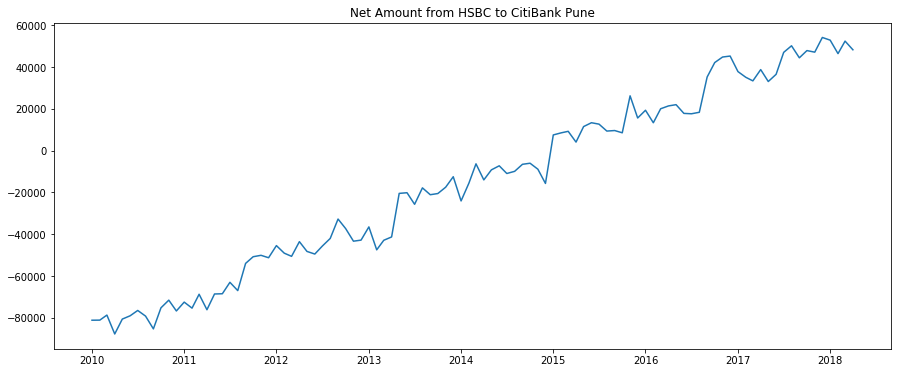

In [8]:
#After taking input display the graph
df = pd.read_csv(r'C:\Users\Ashwin\Downloads\TimeSeriesPrediction-master\TimeSeriesPrediction-master\dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == le)]['Net Amount']
plt.figure(figsize=(15, 6))
plt.title(f'Net Amount from {client} to {le}')
plt.plot(ts)
plt.show()

Text(0.5, 1.0, 'Moving Average of the data to show the trend')

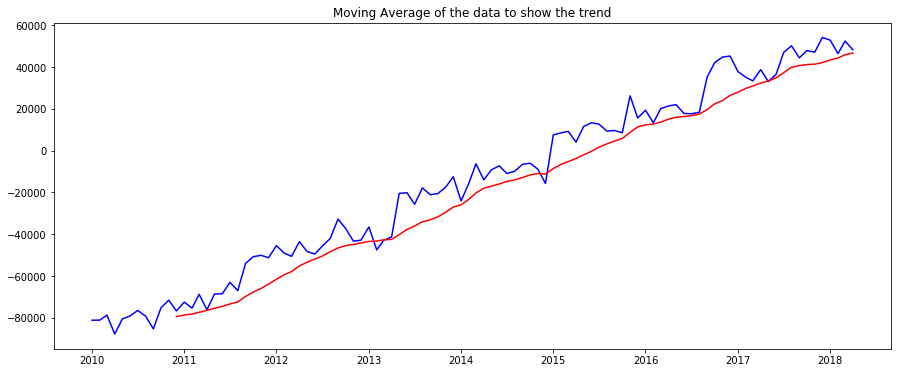

In [10]:
# Moving Average to show the trend
plt.figure(figsize=(15, 6))
rolmean = ts.rolling(window=12,center=False).mean()
orig = plt.plot(ts.index.to_pydatetime(), ts.values, color='blue',label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='red', label='Rolling Mean')
plt.title('Moving Average of the data to show the trend')

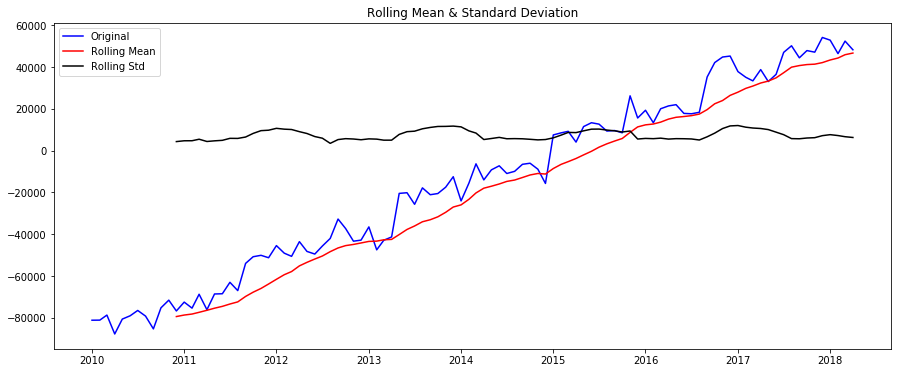

In [11]:
#Test stationarity using graphs
def test_stationarity(timeseries):
    
    timeseries.dropna(inplace = True)
    #print(len(timeseries))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(ts)

In [12]:


#Perform Dickey-Fuller test:
def df_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')
    
df_test(ts)



Results of Dickey-Fuller Test:
Test Statistic                 -0.508136
p-value                         0.890419
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
Result: The series is not stationary


In [15]:
# Perform KPSS test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [16]:
kpss_test(ts)

KPSS Statistic: 0.8744422836755968
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


F:\PROGRAMS_F\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
F:\PROGRAMS_F\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


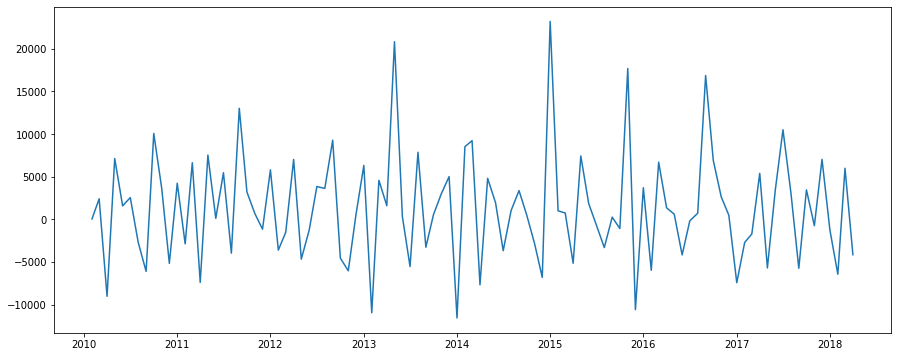

In [30]:
#first order differencing
ts_diff= ts - ts.shift()
plt.figure(figsize=(15, 6))
plt.plot(ts_diff)

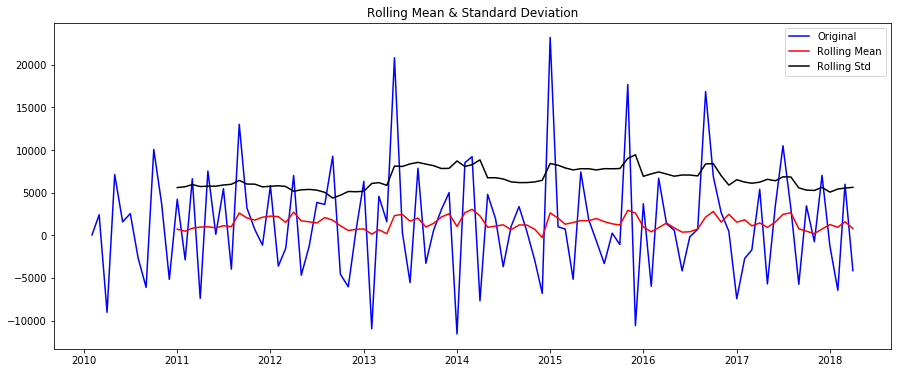

In [31]:
#Test stationarity using graphs
test_stationarity(ts_diff)

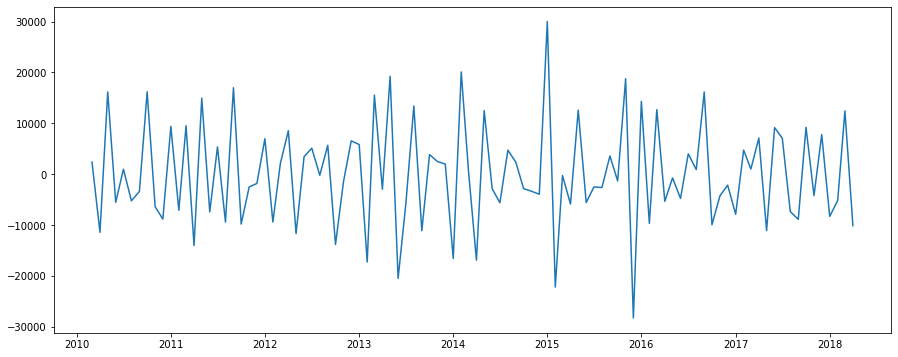

In [32]:
#second order differencing
ts_diff_2 = ts_diff - ts_diff.shift()
plt.figure(figsize=(15, 6))
plt.plot(ts_diff_2)

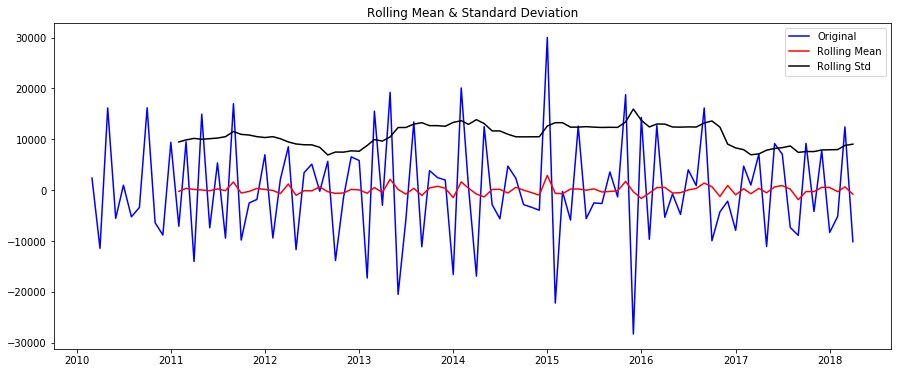

In [33]:
#Test stationarity using graphs
test_stationarity(ts_diff_2)

In [27]:
#Dickey-Fuller Test:
df_test(ts_diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -7.368839e+00
p-value                        9.084385e-11
#Lags Used                     9.000000e+00
Number of Observations Used    8.800000e+01
Critical Value (1%)           -3.506944e+00
Critical Value (5%)           -2.894990e+00
Critical Value (10%)          -2.584615e+00
dtype: float64
Result: The series is stationary


In [34]:
#KPSS_test
kpss_test(ts_diff_2, regression='ct')

KPSS Statistic: 0.06263717154157991
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


F:\PROGRAMS_F\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
F:\PROGRAMS_F\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
